In [1]:
import numpy as np
import keras as k
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dropout,Input, Dense,merge, Add
from keras import optimizers
from keras.models import Model
import pandas as pd

Using TensorFlow backend.


In [2]:
random_ = np.loadtxt("./asy/random.txt")
green_ = np.loadtxt("./asy/green.txt")
# for i in ["Bessel","series","asy"]:
#     input_ = np.loadtxt("./"+i+"/random.txt")
#     output_ = np.loadtxt("./"+i+"/green.txt")
#     random_ = np.append(random_,input_,axis =0)
#     green_ =np.append(green_,output_,axis = 0)
    

In [3]:
X = pd.DataFrame(columns=["amu","beta"])
X["amu"] = random_[:,0]
X["beta"] = random_[:,1]
Y = pd.DataFrame(columns=["G","damu","dbeta"])
Y["G"] = green_[:,0]
Y["damu"] = green_[:,1]
Y["dbeta"] = green_[:,2]

In [4]:
Y.max(axis=0)-Y.min(axis=0),X.max(axis=0)-X.min(axis=0)

(G           282.150526
 damu      14082.609474
 dbeta    702902.612755
 dtype: float64, amu      0.98
 beta    86.00
 dtype: float64)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)
random_scale = preprocessing.MinMaxScaler([0,1])
green_scale = preprocessing.MinMaxScaler([0,5])

random_scale.fit(X_train)
green_scale.fit(y_train)
X_train = random_scale.transform(X_train)
X_test = random_scale.transform(X_test)

y_train = green_scale.transform(y_train)
y_test = green_scale.transform(y_test)

In [6]:
Y1,Y2,Y3 =y_train[:,0],y_train[:,1],y_train[:,2]
Y1_,Y2_,Y3_ =y_test[:,0],y_test[:,1],y_test[:,2]

In [7]:
Y1,Y2,Y3 = Y1.reshape(Y1.size,1),Y2.reshape(Y2.size,1),Y3.reshape(Y3.size,1)
Y1_,Y2_,Y3_ = Y1_.reshape(Y1_.size,1),Y2_.reshape(Y2_.size,1),Y3_.reshape(Y3_.size,1)

In [8]:
inputs = Input(shape=(2,))
x = Dense(8, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
# x = Dense(64, activation='relu')(x)




x1_ = Dense(64, activation='relu')(x)
x1 = Dense(64, activation='relu')(x1_)
x1 = Dense(64, activation='relu')(x1)
x1 = Dense(64, activation='relu')(x1)
x1 = Dense(64, activation='relu')(x1)
x1 = Dense(64, activation='relu')(x1)
# x1 = Add()([x1, x1_])
# x1 = Dense(64, activation='relu')(x1)
y1 = Dense(1, activation=None)(x1)

x2_ = Dense(64, activation='relu')(x)
x2 = Dense(64, activation='relu')(x2_)
x2 = Dense(64, activation='relu')(x2)
x2 = Dense(64, activation='relu')(x2)
x2 = Dense(64, activation='relu')(x2)
x2 = Dense(64, activation='relu')(x2)
x2 = Dense(64, activation='relu')(x2)
x2 = Dense(64, activation='relu')(x2)
# x = Dense(64, activation='relu')(x)
# x2 = Add()([x2, x2_])
y2 = Dense(1, activation=None)(x2)

x3_ = Dense(64, activation='relu')(x)
x3 = Dense(64, activation='relu')(x3_)
x3 = Dense(64, activation='relu')(x3)
x3 = Dense(64, activation='relu')(x3)
x3 = Dense(64, activation='relu')(x3)
x3 = Dense(64, activation='relu')(x3)
x3 = Dense(64, activation='relu')(x3)
x3 = Dense(64, activation='relu')(x3)
x3 = Dense(64, activation='relu')(x3)
# x3 = Add()([x3, x3_])
y3 = Dense(1, activation=None)(x3)

model = Model(inputs=inputs, outputs=[y1,y2,y3])


Instructions for updating:
Colocations handled automatically by placer.


In [11]:
def time_decay(epoch, initial_lrate):
    decay_rate = 0.1
    new_lrate = initial_lrate/(1+decay_rate*epoch)
    return new_lrate
from keras.callbacks import LearningRateScheduler
lrate = LearningRateScheduler(time_decay,verbose=1)

In [12]:
adam = optimizers.adam(lr=0.001)
model.compile(loss=["mean_squared_error","mean_squared_error","mean_squared_error"], optimizer=adam, metrics=["mean_squared_error"])
history = model.fit([X_train], [Y1,Y2,Y3], epochs=40, batch_size=32,validation_data=([X_test],[Y1_,Y2_,Y3_]),callbacks=[lrate])

Train on 596049 samples, validate on 255450 samples
Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.0010000000474974513.
596049/596049 [==============================] - 269s 451us/step - loss: 0.0262 - dense_13_loss: 0.0128 - dense_22_loss: 0.0078 - dense_32_loss: 0.0057 - dense_13_mean_squared_error: 0.0128 - dense_22_mean_squared_error: 0.0078 - dense_32_mean_squared_error: 0.0057 - val_loss: 0.0240 - val_dense_13_loss: 0.0120 - val_dense_22_loss: 0.0069 - val_dense_32_loss: 0.0051 - val_dense_13_mean_squared_error: 0.0120 - val_dense_22_mean_squared_error: 0.0069 - val_dense_32_mean_squared_error: 0.0051
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0009090909522704102.
596049/596049 [==============================] - 263s 440us/step - loss: 0.0261 - dense_13_loss: 0.0128 - dense_22_loss: 0.0077 - dense_32_loss: 0.0057 - dense_13_mean_squared_error: 0.0128 - dense_22_mean_squared_error: 0.0077 - dense_32_mean_squared_error: 0.00

Epoch 15/40

Epoch 00015: LearningRateScheduler setting learning rate to 5.848673367836453e-07.
596049/596049 [==============================] - 256s 430us/step - loss: 0.0257 - dense_13_loss: 0.0126 - dense_22_loss: 0.0076 - dense_32_loss: 0.0055 - dense_13_mean_squared_error: 0.0126 - dense_22_mean_squared_error: 0.0076 - dense_32_mean_squared_error: 0.0055 - val_loss: 0.0239 - val_dense_13_loss: 0.0119 - val_dense_22_loss: 0.0069 - val_dense_32_loss: 0.0051 - val_dense_13_mean_squared_error: 0.0119 - val_dense_22_mean_squared_error: 0.0069 - val_dense_32_mean_squared_error: 0.0051
Epoch 16/40

Epoch 00016: LearningRateScheduler setting learning rate to 2.3394693471345818e-07.
596049/596049 [==============================] - 254s 426us/step - loss: 0.0257 - dense_13_loss: 0.0126 - dense_22_loss: 0.0076 - dense_32_loss: 0.0055 - dense_13_mean_squared_error: 0.0126 - dense_22_mean_squared_error: 0.0076 - dense_32_mean_squared_error: 0.0055 - val_loss: 0.0239 - val_dense_13_loss: 0.0119

KeyboardInterrupt: 

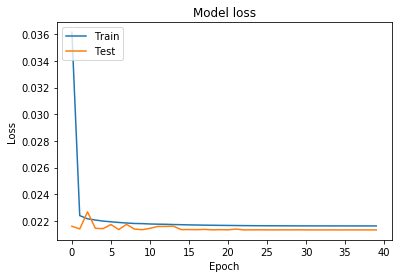

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [13]:
model.save("asy.h5")

In [14]:
model.load_weights("asy.h5")

In [15]:
input_ = random_scale.transform(X)
output_ = model.predict(input_)
output_ = np.transpose(np.array(output_))
output_ = green_scale.inverse_transform(output_.reshape(output_.shape[1],3))


In [18]:
y = np.array(Y)

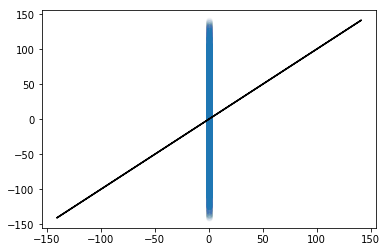

In [19]:
plt.scatter(output_[:,0],y[:,0],alpha=0.01)
plt.plot(y[:,0],y[:,0],'k-') 


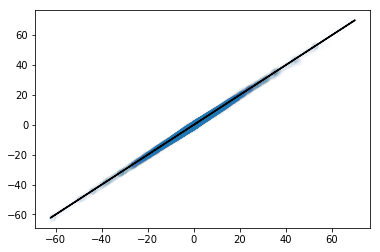

In [114]:
plt.scatter(output_[:,1],[:,1],alpha=0.01)
plt.plot(y[:,1],y[:,1],'k-') 


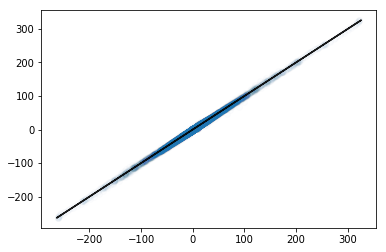

In [117]:
plt.scatter(output_[:,2],y[:,2],alpha=0.01)
plt.plot(y[:,2],y[:,2],'k-',alpha =0.9) 
